## Spendesk

## Step 1 - Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

data_directory_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

## Step 2 - Import Dataset

In [3]:
spendesk_df = pd.read_csv(data_directory_path + "spendesk_survey.csv")
spendesk_df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA

<Axes: >

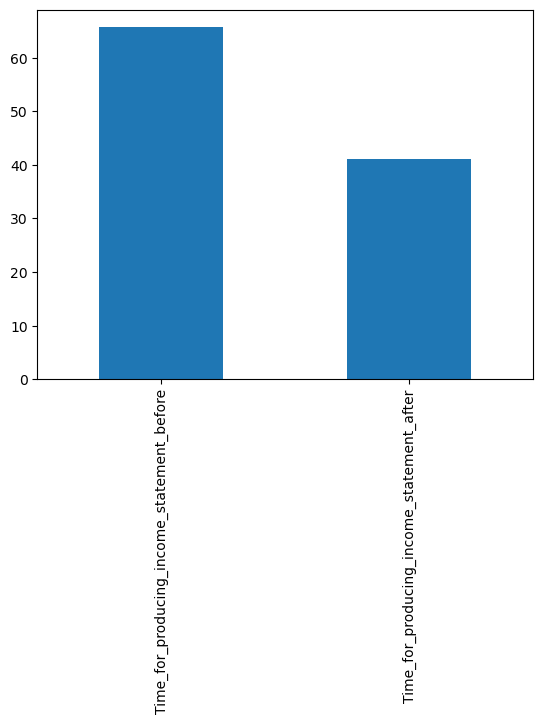

In [ ]:
display(spendesk_df.mean().plot(kind="bar"))

In [17]:
average_boost = (spendesk_df["Time_for_producing_income_statement_before"].mean() - spendesk_df["Time_for_producing_income_statement_after"].mean()) / spendesk_df["Time_for_producing_income_statement_before"].mean()

# Alternative way, using iloc => shorter but not necessary clearer
# average_boost = (spendesk_df.iloc[:, 0].mean() - spendesk_df.iloc[:, 1].mean()) / spendesk_df.iloc[:, 0].mean()


print(f"Average boost : {np.round(average_boost*100)}%")

Average boost : 38.0%


In [18]:
# spendesk_df["time_difference"] = spendesk_df["Time_for_producing_income_statement_before"] - spendesk_df["Time_for_producing_income_statement_after"]

spendesk_df["time_difference"] = spendesk_df.iloc[:, 0] - spendesk_df.iloc[:, 1]
display(spendesk_df.head())

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after,time_difference
0,11,75,-64
1,13,72,-59
2,38,15,23
3,28,34,-6
4,39,17,22


## Step 4 - Define hypothesises

H<sub>0</sub> : time_difference >= 26

H<sub>1</sub> : time_difference < 26

## Step 5 - Calculate Z-score

In [ ]:
mean = spendesk_df.time_difference.mean()
std = spendesk_df.time_difference.std()
n = len(spendesk_df)
mu = 26

calculated_z_score = (mean - mu) / (std / np.sqrt(n))
print(f"z-score : {calculated_z_score}")

Z-score : -1.321211217800986


## Step 6 - Set α

In [ ]:
alpha = 0.10
print(f"alpha : {alpha}")

alpha : 0.1


## Step 7 - Compare p-value to α

In [30]:
z_score, p_value = ztest(spendesk_df.time_difference, alternative="smaller", value=mu)
print(f"z-score : {z_score} | p-value : {p_value}")

if p_value < alpha :
    print("Null hypothesis H0 can be rejected")
else :
    print("NUll hypothesis H0 can't be rejected")

z-score : -1.3212112178009856 | p-value : 0.09321547347727516
Null hypothesis H0 can be rejected


## Step 8 (Optional) - Visualize probability

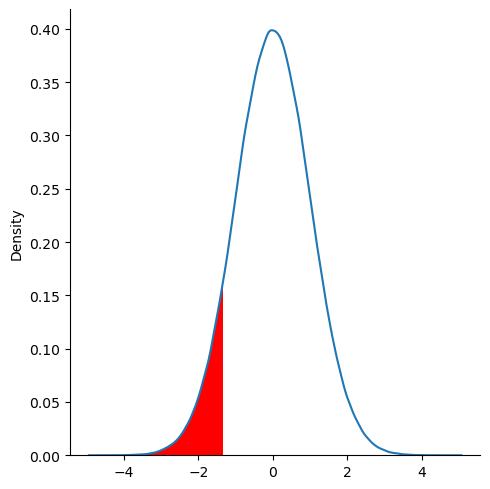

In [25]:
# Distplot from seaborn gives us a distribution from what is inside the parenthesis
# => Dispolot is deprecated, we're going to use Displot instead
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
# => Deprecated attribute, we're using kind="kde" which is the same as a kdeplot(kernel density estimation)
ax = sns.displot(np.random.normal(0, 1, size=1000000), kind="kde") 

# => Since Displot isn't working like Distplot, we need to access the matplotlib axes differently
axes = ax.axes[0, 0]

# This is a mask that will let us filter only the values beyond z-score
mask = axes.lines[0].get_xydata()[:, 0] < z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = axes.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = axes.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
axes.fill_between(x_area_under_curve, y_area_under_curve, color="red")

plt.show()